# **로지스틱 회귀를 이용한 Click Through Rate**
1. 데이터 전처리 및 One-Hot Encoing
1. **Logistic 회귀** 동작의 원리
1. **Gradient descent** 기법, **Statistic Gradient descent** 기법
1. **Logistic 회기** 분류기 학습 및 예측모델
1. **L1, L2 정규화**를 이용한 Logistic 회귀
1. On - Line Learning
1. **Random Forest** 를 이용한 **feacture selection**

<br/>

# **1 One - Hot Encoding**
1. **범주형 feacture** 를 **이진형 수치 feacture** 로 변환
1. **K개의 값**을 갖는 **범주형** feacture를 **1~k 의** feacture로 매핑시킨다
1. 변환된 범주형 데이터를 **원본으로** 되돌린다

## **01 One - Hot Encoding 임베딩 데이터 만들기**
1. **범주형 feacture** 를 **이진형 수치 feacture** 로 변환
1. **K개의 값**을 갖는 **범주형** feacture를 **1~k 의** feacture로 매핑시킨다
1. 변환된 범주형 데이터를 **원본으로** 되돌린다

In [1]:
# Dict 범주형 데이터를 One-Hot-encoding으로 변환
from sklearn.feature_extraction import DictVectorizer
dict_one_hot_encoder = DictVectorizer(sparse=False)

X_dict = [{'interest': 'tech', 'occupation': 'professional'},
          {'interest': 'fashion', 'occupation': 'student'},
          {'interest': 'fashion', 'occupation': 'professional'},
          {'interest': 'sports', 'occupation': 'student'},
          {'interest': 'tech', 'occupation': 'student'},
          {'interest': 'tech', 'occupation': 'retired'},
          {'interest': 'sports', 'occupation': 'professional'}]

X_encoded = dict_one_hot_encoder.fit_transform(X_dict)
X_encoded

array([[0., 0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.]])

In [2]:
# 범주형 Dataset Index 매핑내용 살펴보기
from pprint import pprint
pprint(dict_one_hot_encoder.vocabulary_)

{'interest=fashion': 0,
 'interest=sports': 1,
 'interest=tech': 2,
 'occupation=professional': 3,
 'occupation=retired': 4,
 'occupation=student': 5}


## **02 Converting Data by Using Map Data**
위에서 학습한 **dict_one_hot_encoder** 를 활용하여 데이터를 컨버팅/ 복원

In [3]:
# 위에서 매팽한 table 을 사용하여 새로운 데이터 인코딩
new_dict = [{'interest': 'sports', 'occupation': 'retired'}]
new_encoded = dict_one_hot_encoder.transform(new_dict)
print(new_encoded)

[[0. 1. 0. 0. 1. 0.]]


In [4]:
# new_encoded 인코딩 데이터를 원본형태로 되돌린다
print(dict_one_hot_encoder.inverse_transform(new_encoded))

[{'interest=sports': 1.0, 'occupation=retired': 1.0}]


## **03 Learning New Map Data**
1. **new_encoded :** 새로운 매핑 데이터 추가하면, 결과적으로 **무시된다**
1. 두개의 **dict** 데이터 중 **없는건 제외하고 나머지만 Converting** 된다

In [5]:
# 1개의 인덱스에 포함된 2개의 Dict 중, 1개만 converting 된다
new_dict = [{'interest': 'unknown_interest', 'occupation': 'retired'},
            {'interest': 'tech', 'occupation': 'unseen_occupation'}]
new_encoded = dict_one_hot_encoder.transform(new_dict)
print(new_encoded)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


## **04 LabelEncoder 를 활용한 One-Hot-Encoding**
1. **X_int** : One Hot 의 **인덱스값을** 출력한다
1. 보다 간결하고 식별력이 높다

In [6]:
import numpy as np
X_str = np.array([['tech', 'professional'],
                  ['fashion', 'student'],
                  ['fashion', 'professional'],
                  ['sports', 'student'],
                  ['tech', 'student'],
                  ['tech', 'retired'],
                  ['sports', 'professional']])

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
X_int         = label_encoder.fit_transform(X_str.ravel()).reshape(*X_str.shape)
print(X_int)

[[5 1]
 [0 4]
 [0 1]
 [3 4]
 [5 4]
 [5 2]
 [3 1]]


In [7]:
# X_int 를 X_encoded 로 변환
one_hot_encoder = OneHotEncoder()
X_encoded       = one_hot_encoder.fit_transform(X_int).toarray()
print(X_encoded)

[[0. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [8]:
# Mapping 입력되지 않은 값들은 위와 동일하게 무시된다
new_str = np.array([['unknown_interest', 'retired'],
                  ['tech', 'unseen_occupation'],
                  ['unknown_interest', 'unseen_occupation']])

def string_to_dict(columns, data_str):
    data_dict = []
    for sample_str in data_str:
        data_dict.append({column : value for column, value in zip(columns, sample_str)})
    return data_dict

columns     = ['interest', 'occupation']
new_encoded = dict_one_hot_encoder.transform(string_to_dict(columns, new_str))
print(new_encoded)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


<br/>

# **2 로지스틱 회귀 분류기**
1. **실수값 데이터는 0~1 사이의 값으로** 변환한다
1. $y(z) = \frac{1}{1+exp(-z)}$ 대용량 데이터에 **확장성이 좋은** 알고리즘이다

## **01 로지스틱 회귀의 동작원리**
로지스틱 회귀는 나이브 베이즈 분류기처럼 **확률 기반 분류기이다**

In [9]:
# 로지스틱 회귀 함수를 정의한다
import numpy as np

def sigmoid(input):
    return 1.0 / (1 + np.exp(-input))

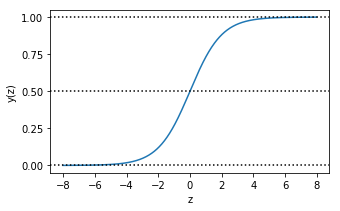

In [10]:
%matplotlib inline
# -8~8 사이의 값으로 로지스틱 회귀모델을 구현
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
z = np.linspace(-8, 8, 1000)
y = sigmoid(z)
plt.plot(z, y)
plt.axhline(y=0,   ls='dotted', color='k')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.axhline(y=1,   ls='dotted', color='k')
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.xlabel('z'); plt.ylabel('y(z)'); plt.show()

## **02 MSE를 최소로 하는 로지스틱 회귀**
비용함수를 최소로(실질적으로는 **MSE기반의 비용함수를** 최소로)하는 값들을 예측한다

/home/markbaum/Python/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


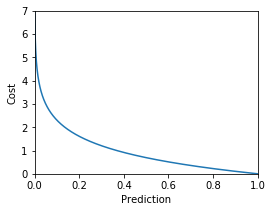

In [11]:
# plot sample cost vs y_hat (prediction), for y (truth) = 1
y_hat = np.linspace(0, 1, 1000)
cost = -np.log(y_hat)
plt.figure(figsize=(4,3))
plt.plot(y_hat, cost)
plt.xlabel('Prediction'); plt.ylabel('Cost')
plt.xlim(0, 1); plt.ylim(0, 7); plt.show()

/home/markbaum/Python/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


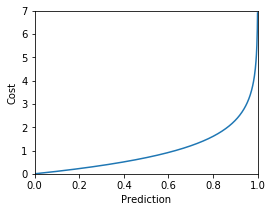

In [12]:
# plot sample cost vs y_hat (prediction), for y (truth) = 0
y_hat = np.linspace(0, 1, 1000)
cost = -np.log(1 - y_hat)
plt.figure(figsize=(4,3))
plt.plot(y_hat, cost)
plt.xlabel('Prediction'); plt.ylabel('Cost')
plt.xlim(0, 1); plt.ylim(0, 7); plt.show()

<br/>

# **3 그레디언트 하강을 활용한 로지스틱 회귀**
1. 단볼록이 아닌, 비볼록 형태의 데이터에 대한 로지스틱 회귀 최적값을 예측한다

## **01 그레디언트 하강기법의 로지스틱 함수 정의**
로지스틱 회귀는 나이브 베이즈 분류기처럼 **확률 기반 분류기이다**

In [13]:
# 현재의 가중치 값을 사용하여 예측값을 계산하는 함수
def compute_prediction(X, weights):
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return predictions 

# Gradient 하강 기법을 단계저긍로 정의하여 가중치를 업데이트 한다
def update_weights_gd(X_train, y_train, weights, learning_rate):
    predictions   = compute_prediction(X_train, weights)
    weights_delta = np.dot(X_train.T, y_train - predictions)
    m             = y_train.shape[0]
    weights      += learning_rate / float(m) * weights_delta
    return weights  # updated weights(numpy.ndarray)

In [14]:
# 비용을 계산하는 함수를 계산한다
def compute_cost(X, y, weights):
    predictions = compute_prediction(X, weights)
    cost = np.mean(-y * np.log(predictions) - (1-y) * np.log(1-predictions))
    return cost # float

# 로지스틱 회귀 모델을 학습한다
def train_logistic_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        # .hstack() 행의 수가 같은 두 개 이상의 배열을 옆으로 연결
        X_train_np   = np.hstack((intercept, X_train))
    weights = np.zeros(X_train_np.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_gd(X_train_np, y_train, weights, learning_rate)
        if iteration % 1000 == 0: # 1000번 학습을 반복한다
            print("{:,}th Logistic Cost : {:.5f}".format(
                iteration, compute_cost(X_train_np, y_train, weights)))
    return weights

In [15]:
# 학습모델을 이용하여 새로운 데이터의 결과를 예측하는 함수
def predict(X, weights):
    if X.shape[1] == weights.shape[0] - 1:
        intercept = np.ones((X.shape[0], 1))
        X         = np.hstack((intercept, X))
    return compute_prediction(X, weights)

## **02 예제 데이터를 활용하여 모델을 학습한다**
1. **절편값이 포함된** 가중치 함수를 기반으로 학습한다
1. **학습률은 0.1**, 로지스틱 회귀 모델을 **1,000번 반복하여** 학습한다

In [16]:
# iterator를 반복할수록 학습의 Cost 값이 줄어듬을 알 수 있다
X_train = np.array([[6, 7],[2, 4],[3, 6],[4, 7],[1, 6],
                    [5, 2],[2, 0],[6, 3],[4, 1],[7, 2]])
y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
weights = train_logistic_regression(X_train, y_train, 
                                    max_iter      = 10000, 
                                    learning_rate = 0.1, 
                                    fit_intercept = True)

0th Logistic Cost : 0.57440
1,000th Logistic Cost : 0.00395
2,000th Logistic Cost : 0.00202
3,000th Logistic Cost : 0.00136
4,000th Logistic Cost : 0.00103
5,000th Logistic Cost : 0.00082
6,000th Logistic Cost : 0.00069
7,000th Logistic Cost : 0.00059
8,000th Logistic Cost : 0.00052
9,000th Logistic Cost : 0.00046


In [17]:
X_test      = np.array([[6, 1],[1, 3],[3, 1],[4, 5]])
predictions = predict(X_test, weights)
predictions

array([9.99999394e-01, 8.71880199e-04, 9.96881227e-01, 3.66361408e-03])

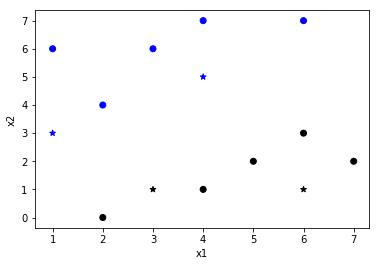

In [18]:
# 분류 판단을 위한 임계치로 0.5를 설정하여 결과를 출력한다
# Train 데이터로 학습한 모델이, 새로운 데이터에 대해서도 잘 적용됨을 볼 수 있다
plt.scatter(X_train[:,0], X_train[:,1], 
            marker = 'o',
            c = ['b'] * 5 + ['k'] * 5)

colours = ['k' if prediction >= 0.5 else 'b' for prediction in predictions]
plt.scatter(X_test[:,0], X_test[:,1], 
            marker = '*',
            c = colours)
plt.xlabel('x1'); plt.ylabel('x2'); plt.show()

<br/>

# **4 그레디언트 하강과 로지스틱 화귀를 이용한 CTR 예측**
Click Through Rate

## **01 알고리즘에 1K개의 데이터로 학습**
데이터 Set **앞 1,000개로** 학습, **뒤의 1,000개로** 테스트 한다

In [19]:
import csv
def read_ad_click_data(n, offset=0):
    X_dict, y = [], []
    with open('./data/train.csv', 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for i in range(offset):
            next(reader)
        i = 0
        for row in reader:
            i += 1
            y.append(int(row['click']))
            del row['click'], row['id'], row['hour'], row['device_id'], row['device_ip']
            X_dict.append(dict(row))
            if i >= n: break
    return X_dict, y

n = 1000
X_dict_train, y_train = read_ad_click_data(n)
print(X_dict_train[0])
print(X_dict_train[1])

{'C1': '1005', 'C14': '15706', 'C15': '320', 'C16': '50', 'C17': '1722', 'C18': '0', 'C19': '35', 'C20': '-1', 'C21': '79', 'app_category': '07d7df22', 'app_domain': '7801e8d9', 'app_id': 'ecad2386', 'banner_pos': '0', 'device_conn_type': '2', 'device_model': '44956a24', 'device_type': '1', 'site_category': '28905ebd', 'site_domain': 'f3845767', 'site_id': '1fbe01fe'}
{'C1': '1005', 'C14': '15704', 'C15': '320', 'C16': '50', 'C17': '1722', 'C18': '0', 'C19': '35', 'C20': '100084', 'C21': '79', 'app_category': '07d7df22', 'app_domain': '7801e8d9', 'app_id': 'ecad2386', 'banner_pos': '0', 'device_conn_type': '0', 'device_model': '711ee120', 'device_type': '1', 'site_category': '28905ebd', 'site_domain': 'f3845767', 'site_id': '1fbe01fe'}


In [20]:
# 데이터 학습을 위해 One-Hot-Encoding 객체로 임베딩
from sklearn.feature_extraction import DictVectorizer
dict_one_hot_encoder   = DictVectorizer(sparse=False)
X_train                = dict_one_hot_encoder.fit_transform(X_dict_train)
X_dict_test, y_test_1k = read_ad_click_data(n, n)
X_test = dict_one_hot_encoder.transform(X_dict_test)

X_train_1k = X_train
y_train_1k = np.array(y_train)

import timeit
start_time = timeit.default_timer()
weights = train_logistic_regression(X_train_1k, y_train_1k, max_iter=10000, learning_rate=0.01, fit_intercept=True)
print("--- %0.3fs seconds ---" % (timeit.default_timer() - start_time))

0th Logistic Cost : 0.68107
1,000th Logistic Cost : 0.41219
2,000th Logistic Cost : 0.40069
3,000th Logistic Cost : 0.39300
4,000th Logistic Cost : 0.38696
5,000th Logistic Cost : 0.38186
6,000th Logistic Cost : 0.37740
7,000th Logistic Cost : 0.37341
8,000th Logistic Cost : 0.36979
9,000th Logistic Cost : 0.36646
--- 7.747s seconds ---


In [21]:
# 위에서 학습한 모델의 정확도 측정
X_test_1k  = X_test
predictions = predict(X_test_1k, weights)
from sklearn.metrics import roc_auc_score
print('The ROC AUC on testing set is: {0:.3f}'.format(roc_auc_score(y_test_1k, predictions)))

The ROC AUC on testing set is: 0.663


## **02 SGD 그래디언트 하강기법을 사용**
1. **update_weights_sgd()** 함수를 사용
1. **SGD 기법으로** 데이터 Set **앞 1,000개로** 학습, **뒤의 1,000개로** 테스트 한다

In [22]:
# SGD를 이용한 로지스틱 회귀 알고리즘에 맞게 수정
def update_weights_sgd(X_train, y_train, weights, learning_rate):
    for X_each, y_each in zip(X_train, y_train):
        prediction = compute_prediction(X_each, weights)
        weights_delta = X_each.T * (y_each - prediction)
        weights += learning_rate * weights_delta
    return weights

In [23]:
# update_weights_sgd() 로 로지스틱 회귀 알고리즘을 적용
def train_logistic_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train))
    weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_sgd(X_train, y_train, weights, learning_rate)
        # Check the cost for every 2 (for example) iterations
        if iteration % 2 == 0:
            print("{:,}th SGD Logistic : {:.5f}".format(
                iteration, compute_cost(X_train, y_train, weights)))
    return weights

In [24]:
# 1K 샘플 데이터로 SGD model 
start_time = timeit.default_timer()
weights = train_logistic_regression(X_train_1k, y_train_1k, max_iter=5, learning_rate=0.01, fit_intercept=True)
print("--- %0.3fs seconds ---" % (timeit.default_timer() - start_time))

0th SGD Logistic : 0.41983
2th SGD Logistic : 0.40212
4th SGD Logistic : 0.39185
--- 0.155s seconds ---


In [25]:
predictions = predict(X_test_1k, weights)
print('The ROC AUC on testing set is: {0:.3f}'.format(roc_auc_score(y_test_1k, predictions)))

The ROC AUC on testing set is: 0.672


## **03 SGD 알고리즘에 10K개의 데이터로 학습**
1. 데이터 Set **앞 10,000개로** 학습, **뒤의 10,000개로** 테스트 한다
1. 훨씬 속도도 빠르고 모델의 결과도 좋게 출력된다

In [26]:
n = 10000
X_dict_train, y_train = read_ad_click_data(n)
dict_one_hot_encoder  = DictVectorizer(sparse=False)
X_train = dict_one_hot_encoder.fit_transform(X_dict_train)

X_train_10k = X_train
y_train_10k = np.array(y_train)

# Train the SGD model based on 100000 samples
start_time = timeit.default_timer()
weights = train_logistic_regression(X_train_10k, y_train_10k, max_iter=5, learning_rate=0.01, fit_intercept=True)
print("--- %0.3fs seconds ---" % (timeit.default_timer() - start_time))

0th SGD Logistic : 0.41497
2th SGD Logistic : 0.40601
4th SGD Logistic : 0.40105
--- 0.947s seconds ---


In [27]:
X_dict_test, y_test_10k = read_ad_click_data(10000, 10000)
X_test_10k = dict_one_hot_encoder.transform(X_dict_test)

predictions = predict(X_test_10k, weights)
print('The ROC AUC on testing set is: {0:.3f}'.format(roc_auc_score(y_test_10k, predictions)))

The ROC AUC on testing set is: 0.720


<br/>

# **5 Sklearn 을 활용한 SGD 알고리즘으로 CTR 예측**
scikit-learn 모듈의 활용

In [28]:
# Use scikit-learn package
from sklearn.linear_model import SGDClassifier
sgd_lr = SGDClassifier(loss='log', penalty=None, 
                       fit_intercept=True, max_iter=5, 
                       learning_rate='constant', eta0=0.01)
sgd_lr.fit(X_train_10k, y_train_10k)


predictions = sgd_lr.predict_proba(X_test_10k)[:, 1]
print('The ROC AUC on testing set is: {0:.3f}'.format(roc_auc_score(y_test_10k, predictions)))

The ROC AUC on testing set is: 0.721


<br/>

# **6 정규화 기법을 이용한 SGD**
**L1 정규화 기법을** 활용한 로지스틱 회귀모델 **Feature Selection**

In [29]:
l1_feature_selector = SGDClassifier(loss = 'log', penalty = 'l1', 
                                    alpha = 0.0001, fit_intercept = True, 
                                    max_iter = 5, learning_rate = 'constant', 
                                    eta0 = 0.01)
l1_feature_selector.fit(X_train_10k, y_train_10k)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [30]:
# 중요 Feature 정규화  cf) transform 은 작동하지 않는다 (Coding Error)
# X_train_10k_selected = l1_feature_selector.transform(X_train_10k)
print("원본 데이터 Set : ", X_train_10k.shape)
print("Ramdom Forest 로 특징 feature 선별 : ", X_train_10k_selected.shape)

/home/markbaum/Python/python/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


원본 데이터 Set :  (10000, 2820)
Ramdom Forest 로 특징 feature 선별 :  (10000, 500)


In [31]:
# 하위 10 개의 weights 그리고 the corresponding 10 least important features
print(np.sort(l1_feature_selector.coef_)[0][:10])
print(np.argsort(l1_feature_selector.coef_)[0][:10])

[-0.5962561  -0.44022485 -0.42428472 -0.42428472 -0.41595815 -0.41548047
 -0.31676318 -0.30903059 -0.30744771 -0.28089655]
[ 559 2172 2566 2370 1540   34  579 2116  278  577]


In [32]:
# 상위 10 개의 weights and the corresponding 10 most important features
print(np.sort(l1_feature_selector.coef_)[0][-10:])
print(np.argsort(l1_feature_selector.coef_)[0][-10:])

[0.28423705 0.2842371  0.29318359 0.29969314 0.31062841 0.34092667
 0.34649048 0.34906087 0.36057499 0.40919723]
[2769  363  546 2275  547 2149 1503 2580 1519 2761]


<br/>

# **7 온라인 러닝 대규모 데이터세트 학습**
실시간 데이터는 **청크 데이터**로 **작은 크기로 전처리 작업을** 수행한다

In [33]:
# The number of iterations is set to 1 if using partial_fit.
sgd_lr = SGDClassifier(loss='log', penalty=None, fit_intercept=True, max_iter=1, learning_rate='constant', eta0=0.01)

import timeit
start_time = timeit.default_timer()

# there are 40428968 labelled samples, use the first ten 100k samples for training, and the next 100k for testing
for i in range(20):
    X_dict_train, y_train_every_100k = read_ad_click_data(1000, i * 1000)
    X_train_every_100k = dict_one_hot_encoder.transform(X_dict_train)
    sgd_lr.partial_fit(X_train_every_100k, y_train_every_100k, classes=[0, 1])

print("--- %0.3fs seconds ---" % (timeit.default_timer() - start_time))

--- 2.423s seconds ---


In [34]:
X_dict_test, y_test_next10k = read_ad_click_data(1000, (i + 1) * 1000)
X_test_next10k = dict_one_hot_encoder.transform(X_dict_test)
predictions    = sgd_lr.predict_proba(X_test_next10k)[:, 1]
print('The ROC AUC on testing set is: {0:.3f}'.format(roc_auc_score(y_test_next10k, predictions)))

The ROC AUC on testing set is: 0.694


<br/>

# **8 다중 클래스의 분류처리**
전체 **20개의 카테고리로** 분류된 텍스트를 **SGD 를 활용한** 모델링

In [35]:
# 뉴스그룹 데이터를 호출하기 & 텍스트 전처리를 작업한다
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
all_names  = set(names.words())
lemmatizer = WordNetLemmatizer()

def letters_only(astr):
    for c in astr:
        if not c.isalpha(): 
            return False
    return True

def clean_text(docs):
    cleaned_docs = []
    for doc in docs:
        cleaned_docs.append(' '.join([lemmatizer.lemmatize(word.lower())
                                        for word in doc.split()
                                        if letters_only(word)
                                        and word not in all_names]))
    return cleaned_docs

In [36]:
# 뉴스그룹 데이터를 불러온다
from sklearn.datasets import fetch_20newsgroups
data_train = fetch_20newsgroups(subset='train', categories=None, random_state=42)
data_test  = fetch_20newsgroups(subset='test',  categories=None, random_state=42)

# 텍스트를 전처리
cleaned_train = clean_text(data_train.data)
cleaned_test  = clean_text(data_test.data)
# 라벨링 처리
label_train   = data_train.target
label_test    = data_test.target

In [37]:
# 전처리 작업된 텍스트를 Tf-IDF로 변환
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english', max_features=40000)
term_docs_train  = tfidf_vectorizer.fit_transform(cleaned_train)
term_docs_test   = tfidf_vectorizer.transform(cleaned_test)

# grid search 검색을 적용
from sklearn.model_selection import GridSearchCV
parameters = {'penalty': ['l2', None],
              'alpha'  : [1e-07, 1e-06, 1e-05, 1e-04],
              'eta0'   : [0.01, 0.1, 1, 10]}

In [38]:
# SGD 분류기를 활용하여 예측모델을 생성한다
sgd_lr      = SGDClassifier(loss='log', learning_rate='constant', eta0=0.01, fit_intercept=True, max_iter=10)
grid_search = GridSearchCV(sgd_lr, parameters, n_jobs=-1, cv=3)

grid_search.fit(term_docs_train, label_train)
print(grid_search.best_params_)

{'alpha': 1e-07, 'eta0': 10, 'penalty': 'l2'}


In [41]:
accuracy    = sgd_lr_best.score(term_docs_test, label_test)
print('The accuracy on testing set is: {0:.1f}%'.format(accuracy*100))
grid_search.best_estimator_

The accuracy on testing set is: 79.6%


SGDClassifier(alpha=1e-07, average=False, class_weight=None, epsilon=0.1,
       eta0=10, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', max_iter=10, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

<br/>

# **9 Feature Selection 과 Random Forest 비교**
1. **feature_importance_** : feature의 중요도를 출력

In [42]:
# Random Foreset 로 중요도 높은 500개의 데이터를 추출한다
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100, 
                                       criterion    = 'gini', 
                                       min_samples_split = 30, 
                                       n_jobs = -1)
random_forest.fit(X_train_10k, y_train_10k)

top500_feature = np.argsort(random_forest.feature_importances_)[-500:]
X_train_10k_selected = X_train_10k[:, top500_feature]

In [43]:
# 상관성 중요도 하위 10 위 가중치 출력
print(np.sort(random_forest.feature_importances_)[:10])
print(np.argsort(random_forest.feature_importances_)[:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[2040 2764 2280 1896 1001 1454  756  135 2676  764]


In [44]:
# 상관성 중요도 상위 10 위 가중치 출력 (중요도 클수록 나중에 출력)
print(np.sort(random_forest.feature_importances_)[-10:])
print(np.argsort(random_forest.feature_importances_)[-10:])

[0.00755481 0.00772242 0.00798538 0.00818412 0.00886733 0.00905481
 0.00942318 0.00986043 0.01424382 0.01465488]
[2307  549 1284 1503 1540 1923 1085  314  554  393]


In [45]:
# 393번째 학습모델이 상위
print(dict_one_hot_encoder.feature_names_[393])

C18=2


In [46]:
# 상위 500개의 feature를 선택 출력한다
top500_feature       = np.argsort(random_forest.feature_importances_)[-500:]
X_train_10k_selected = X_train_10k[:, top500_feature]
print(X_train_10k_selected.shape)

(10000, 500)
